In [82]:
import acquire
import pandas as pd
import wrangle_zillow
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [83]:
# acquiring the zillow data set

df = acquire.get_data()

In [84]:
# removing duplicate columns and getting only the single unit properties

zillow = wrangle_zillow.get_single_unit(df)

In [85]:
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,buildingclassdesc,propertylandusedesc,airconditioningdesc,architecturalstyledesc,heatingorsystemdesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,Single Family Residential,None,None,None,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,Single Family Residential,None,None,None,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,Single Family Residential,None,None,None,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,Single Family Residential,None,None,Central,None,None
6,781532,12095076,1.0,NaN,NaN,3.0,4.0,NaN,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,None,Single Family Residential,Central,None,Central,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,673515,11000655,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,...,6.037101e+13,0.020615,2017-09-20,None,Single Family Residential,None,None,Central,None,None
77410,2968375,17239384,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,...,6.111008e+13,0.013209,2017-09-21,None,Single Family Residential,None,None,None,None,None
77411,1843709,12773139,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,...,6.037434e+13,0.037129,2017-09-21,None,Single Family Residential,Central,None,Central,None,None
77412,1187175,12826780,NaN,NaN,NaN,2.0,3.0,NaN,6.0,2.0,...,6.037503e+13,0.007204,2017-09-25,None,Single Family Residential,None,None,Central,None,None


In [86]:
# handling the missing values by requiring both columns and rows to have atleast 90% value

zillow = wrangle_zillow.handle_missing_values(zillow, .8, .6)

In [87]:
zillow

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,...,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,...,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,...,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,...,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
6,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,...,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77409,673515,11000655,2.0,2.0,2.0,1286.0,1286.0,6037.0,2.0,34245368.0,...,1940.0,70917.0,354621.0,2016.0,283704.0,4478.43,6.037101e+13,0.020615,2017-09-20,Single Family Residential
77410,2968375,17239384,2.0,4.0,2.0,1612.0,1612.0,6111.0,2.0,34300140.0,...,1964.0,50683.0,67205.0,2016.0,16522.0,1107.48,6.111008e+13,0.013209,2017-09-21,Single Family Residential
77411,1843709,12773139,1.0,3.0,1.0,1032.0,1032.0,6037.0,1.0,34040895.0,...,1954.0,32797.0,49546.0,2016.0,16749.0,876.43,6.037434e+13,0.037129,2017-09-21,Single Family Residential
77412,1187175,12826780,2.0,3.0,2.0,1762.0,1762.0,6037.0,2.0,33937685.0,...,1955.0,140000.0,522000.0,2016.0,382000.0,6317.15,6.037503e+13,0.007204,2017-09-25,Single Family Residential


In [88]:
# lets check how many missing values we have left
zillow.isna().sum()

id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                162
calculatedfinishedsquarefeet     107
finishedsquarefeet12             273
fips                               0
fullbathcnt                      162
latitude                           0
longitude                          0
lotsizesquarefeet                375
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1036
regionidcounty                     0
regionidzip                       26
roomcnt                            0
yearbuilt                        140
structuretaxvaluedollarcnt        82
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              125
logerror                           0
t

In [89]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52357 entries, 0 to 77413
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52357 non-null  int64  
 1   parcelid                      52357 non-null  int64  
 2   bathroomcnt                   52357 non-null  float64
 3   bedroomcnt                    52357 non-null  float64
 4   calculatedbathnbr             52195 non-null  float64
 5   calculatedfinishedsquarefeet  52250 non-null  float64
 6   finishedsquarefeet12          52084 non-null  float64
 7   fips                          52357 non-null  float64
 8   fullbathcnt                   52195 non-null  float64
 9   latitude                      52357 non-null  float64
 10  longitude                     52357 non-null  float64
 11  lotsizesquarefeet             51982 non-null  float64
 12  propertycountylandusecode     52357 non-null  object 
 13  p

In [90]:
zillow = wrangle_zillow.clean_zillow(zillow)

In [91]:
# creating a function that takes in a dataframe, list of columns to check outliers for
# and returns a df with the outliers removed

def check_outliers(df, cols_to_check):
    
    for col in cols_to_check:
        iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
        upper_bound = df[col].quantile(0.75) +  1.5 * iqr
        lower_bound = df[col].quantile(0.25) - 1.5 * iqr
        df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]
    return df  

In [92]:
cols_to_check = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','fullbathcnt',
               'roomcnt', 'structuretaxvaluedollarcnt','taxvaluedollarcnt','landtaxvaluedollarcnt',
       'taxamount']

zillow = check_outliers(zillow, cols_to_check = cols_to_check)

In [93]:
train, test, validate = wrangle_zillow.split_zillow(zillow)

train.shape, test.shape, validate.shape

((27740, 26), (8669, 26), (6935, 26))

In [94]:
# So how are we going to fill in the missing values?
# if the columns are categorical/discrete we wil used mode, if its continuous we will use median
cat_cols = [ 'fullbathcnt', 'regionidcity', 'regionidzip','yearbuilt']
cont_cols = ['censustractandblock', 'taxamount', 'landtaxvaluedollarcnt', 'taxvaluedollarcnt', 'lotsizesquarefeet', 
            'calculatedfinishedsquarefeet', 'structuretaxvaluedollarcnt']

train, test, validate = wrangle_zillow.fill_na(train, test, validate, cat_cols = cat_cols, cont_cols = cont_cols)

In [95]:
train.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [96]:
validate.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

In [97]:
test.isnull().sum()

id                              0
parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
calculatedfinishedsquarefeet    0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
transactiondate                 0
propertylandusedesc             0
dtype: int64

## LETS START EXPLORING

In [98]:
train.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,...,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
64747,1086539,14491384,2.0,3.0,1672.0,6059.0,2.0,33615806.0,-117661868.0,6200.0,...,1972.0,116474.0,355554.0,2016.0,239080.0,3610.14,6.059032e+13,-0.017699,2017-08-09,Single Family Residential
76163,1990239,12190990,1.0,3.0,1509.0,6037.0,1.0,33976783.0,-118291247.0,4913.0,...,1920.0,72058.0,252211.0,2016.0,180153.0,3103.67,6.037237e+13,0.063732,2017-09-13,Single Family Residential
45216,2323625,14319971,2.5,4.0,2442.0,6059.0,2.0,33632715.0,-117816063.0,7888.0,...,1971.0,178545.0,644179.0,2016.0,465634.0,6574.24,6.059063e+13,-0.010918,2017-06-12,Single Family Residential
9760,2528528,12624220,3.0,3.0,1880.0,6037.0,3.0,33785003.0,-118304371.0,7432.0,...,1949.0,221516.0,330188.0,2016.0,108672.0,4175.42,6.037293e+13,-0.021854,2017-02-14,Single Family Residential
18132,1507332,17245741,2.5,4.0,2071.0,6111.0,2.0,34276728.0,-118731605.0,6549.0,...,1964.0,152966.0,250585.0,2016.0,97619.0,3064.12,6.111008e+13,-0.004711,2017-03-17,Single Family Residential


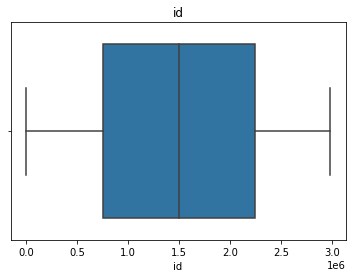

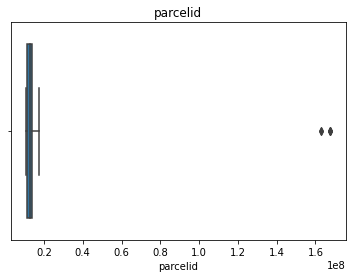

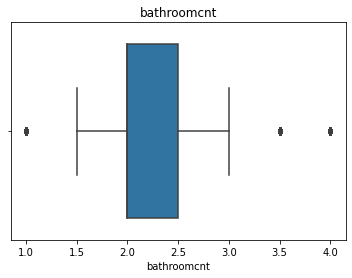

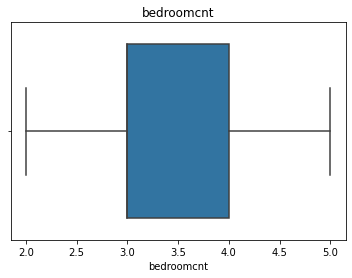

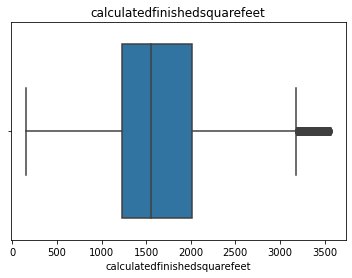

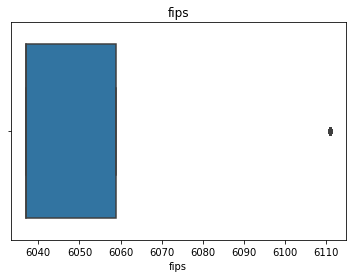

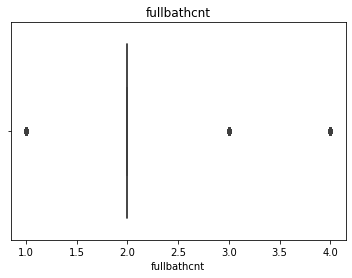

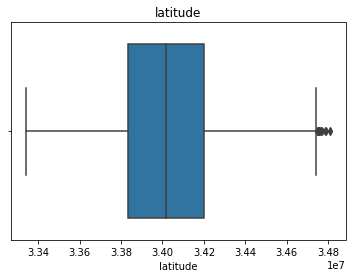

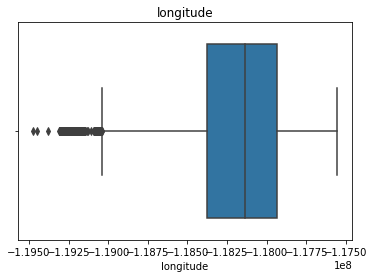

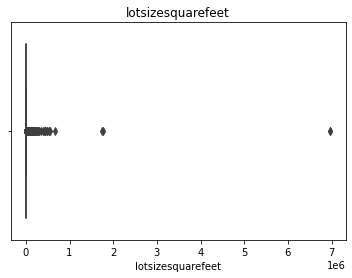

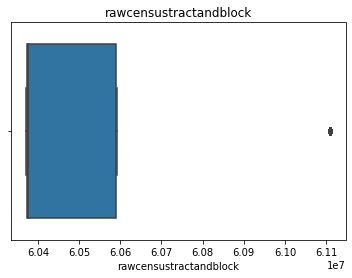

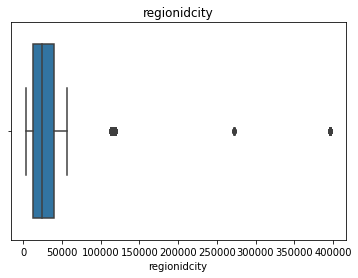

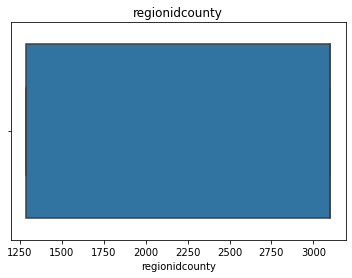

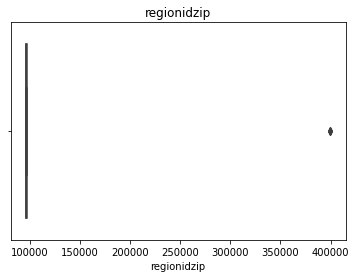

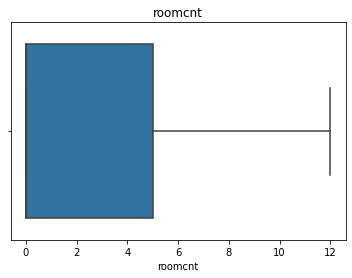

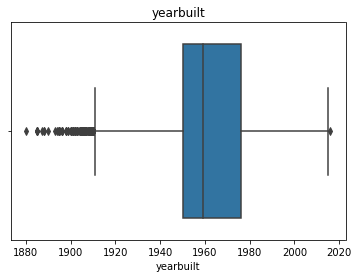

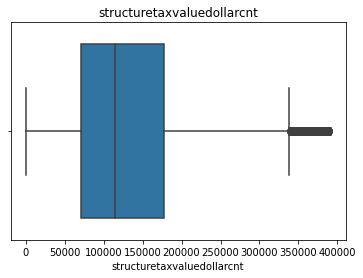

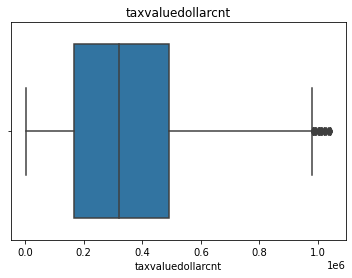

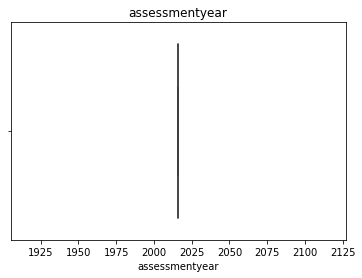

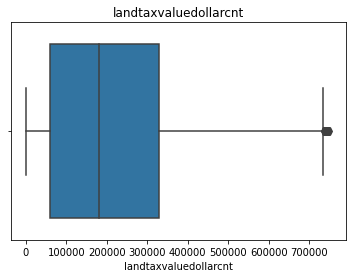

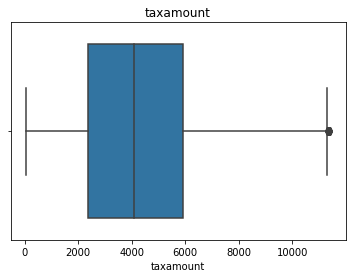

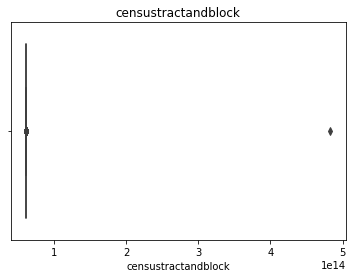

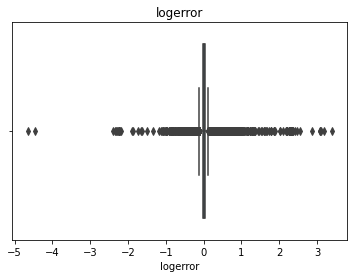

In [99]:
# lets check if we have outliers in numeric datatypes

for col in train.select_dtypes(include = 'number').columns:
    sns.boxplot(train[col])
    plt.title(col)
    plt.show()

## How is log error distributed amongst different fips code?

In [100]:
# lets groupby our data on fips and get some discriptive stats on log error

train.groupby('fips').logerror.describe()


,count,mean,std,min,25%,50%,75%,max
fips,,,,,,,,
6037.0,18204.0,0.014977,0.169795,-4.655420,-0.029024,0.004833,0.038835,3.394544
6059.0,7242.0,0.021972,0.166868,-2.387800,-0.017350,0.007173,0.034404,2.355489
6111.0,2294.0,0.015179,0.157139,-2.238112,-0.018314,0.005804,0.031951,2.177363


<AxesSubplot:>

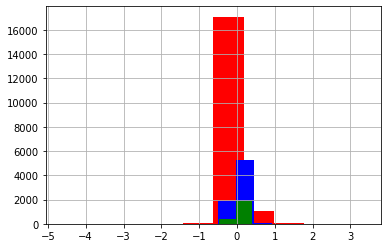

In [101]:
# plotting histogram of the log error in different fips code

ax = train[train.fips == 6037.0].logerror.hist(color = 'red')
train[train.fips == 6059.0].logerror.hist(ax = ax, color = 'blue')
train[train.fips == 6111.0].logerror.hist(ax = ax, color = 'green')

**Takeaways:**
- The log error seems evenly distributed amongst different fips code. However, the count in one area is significntly higher than the other. And there are few outlies in each

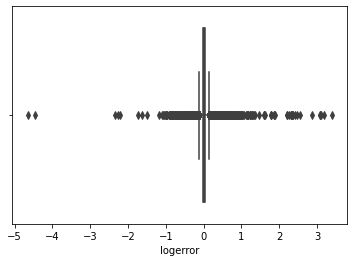

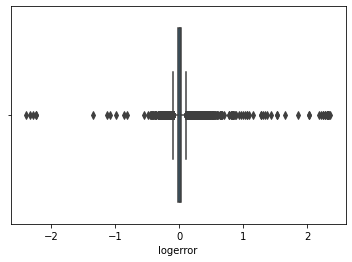

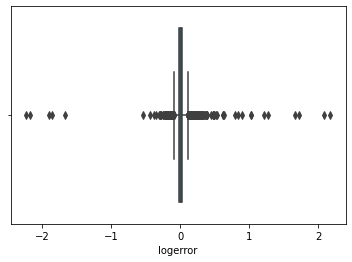

In [102]:
# plotting the boxplot of the logerror in different fips code

sns.boxplot(train[train.fips == 6037.0].logerror)
plt.show()

sns.boxplot(train[train.fips == 6059.0].logerror)
plt.show()

sns.boxplot(train[train.fips == 6111.0].logerror)
plt.show()


## Are there zipcode where the logerror is higher  or lower than the average logerror?

In [103]:
train.groupby('regionidzip').logerror.describe()

,count,mean,std,min,25%,50%,75%,max
regionidzip,,,,,,,,
95982.0,44.0,-0.026533,0.170769,-0.697602,-0.066795,-0.027675,0.069197,0.304941
95983.0,94.0,0.007433,0.187209,-0.965342,-0.056004,-0.001945,0.040916,0.603451
95984.0,72.0,-0.041548,0.327796,-0.996519,-0.070416,-0.010337,0.041900,0.972332
95985.0,40.0,-0.063144,0.292418,-1.738639,-0.080657,-0.015660,0.038328,0.213379
95986.0,8.0,0.057292,0.140048,-0.191605,-0.008133,0.061157,0.164979,0.226761
...,...,...,...,...,...,...,...,...
97329.0,331.0,0.013116,0.128546,-0.382067,-0.020812,0.002922,0.023154,1.609746
97330.0,223.0,-0.003714,0.098931,-0.423369,-0.036291,-0.008856,0.012730,0.670194
97331.0,5.0,0.014898,0.146574,-0.166361,-0.031492,-0.012392,0.048324,0.236409


In [104]:
from scipy import stats

In [105]:
# creating a function that runs a one sample t test and returns a list of zipcode with higher
# mean and lower mean compared to the overall average


def get_zip_with_high_logerror(df):
    zipcode = []
    for val in df.regionidzip.unique():
        a = 0.025
        x1 = df[df.regionidzip == val].logerror
        x2 = df.logerror
        t, p = stats.ttest_1samp(x1, x2.mean())
        if (t > 0) & (p < a):
            zipcode.append(val)
        
    return zipcode
def get_zip_with_low_logerror(df):
    zipcode = []
    for val in df.regionidzip.unique():
        a = 0.025
        x1 = df[df.regionidzip == val].logerror
        x2 = df.logerror
        t, p = stats.ttest_1samp(x1, x2.mean())
        if (t < 0) & (p < a):
            zipcode.append(val)
        
    return zipcode

In [106]:
high_zipcode = get_zip_with_high_logerror(train)

low_zipcode = get_zip_with_low_logerror(train)

print(high_zipcode)
print()

print(low_zipcode)

[96465.0, 96492.0, 96197.0, 96951.0]

[97330.0, 96395.0, 96095.0, 96237.0, 95989.0, 96007.0, 96022.0, 96047.0, 96948.0, 96978.0, 96043.0, 97018.0, 96293.0, 97084.0, 96946.0, 96152.0, 96377.0, 96045.0, 96120.0, 96271.0, 96137.0, 96282.0, 96280.0, 96478.0, 96005.0, 96097.0]


**Takeaways:**
    - there are certain zipcodes where the log error is significantly higher than the average logerror
    - and there are certain zipcodes where the log error is significantly lower than the average logerror

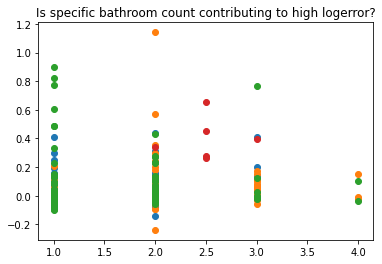

In [107]:
# Is certain bathroom count contributing to higher logerror?

for code in high_zipcode:
    plt.scatter(train[train.regionidzip == code].bathroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bathroom count contributing to high logerror?')
    
   

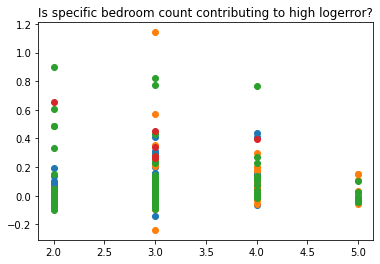

In [108]:
for code in high_zipcode:
    plt.scatter(train[train.regionidzip == code].bedroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bedroom count contributing to high logerror?')

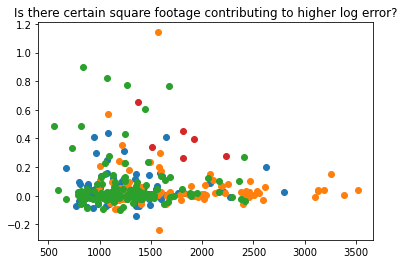

In [109]:
for code in high_zipcode:
    plt.scatter(train[train.regionidzip == code].calculatedfinishedsquarefeet, train[train.regionidzip == code].logerror)
    plt.title('Is there certain square footage contributing to higher log error?')
    
#     train.calculatedfinishedsquarefeet.hist(ax = ax)


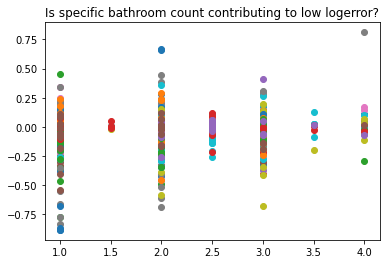

In [110]:
for code in low_zipcode:
    plt.scatter(train[train.regionidzip == code].bathroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bathroom count contributing to low logerror?')

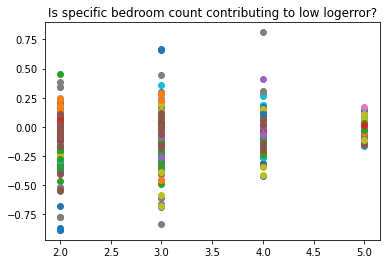

In [111]:
for code in low_zipcode:
    plt.scatter(train[train.regionidzip == code].bedroomcnt, train[train.regionidzip == code].logerror)
    plt.title('Is specific bedroom count contributing to low logerror?')

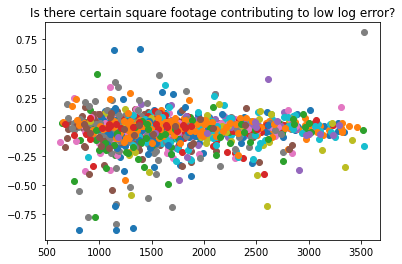

In [112]:
for code in low_zipcode:
    plt.scatter(train[train.regionidzip == code].calculatedfinishedsquarefeet, train[train.regionidzip == code].logerror)
    plt.title('Is there certain square footage contributing to low log error?')

Text(0.5, 1.0, 'lat vs long')

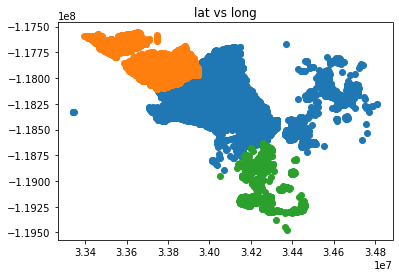

In [113]:
plt.scatter(train[train.fips == 6037.0].latitude, train[train.fips == 6037.0].longitude)

plt.scatter(train[train.fips == 6059.0].latitude, train[train.fips == 6059.0].longitude)

plt.scatter(train[train.fips == 6111.0].latitude, train[train.fips == 6111.0].longitude)
plt.title('lat vs long')

Takeaways:
- theres is a clear distinction between different fips except blue. there are observations that are clearly outliers
    
    

### How does number of bathroom count influence avg log error

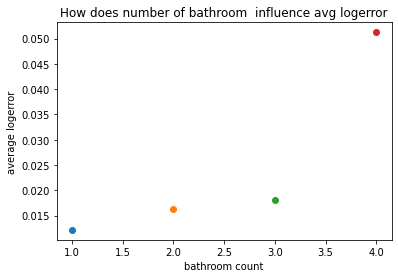

In [114]:
val =[1,2,3,4,5,6,7, 8, 9, 10]
for num in val:
    plt.scatter(num, train[train.bathroomcnt == num].logerror.mean())
    plt.title('How does number of bathroom  influence avg logerror')
    plt.xlabel('bathroom count')
    plt.ylabel('average logerror')

Takeaway:
- as the number of bathroom increases, the log error increases to positive and then drops significantly to negative for 9 and 10

### How does number of bedroom count influence avg log error

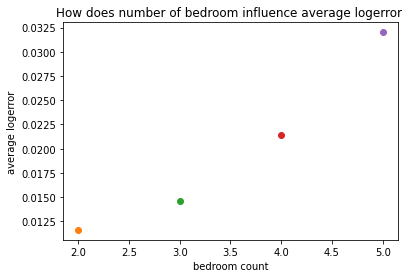

In [115]:
val =[1,2,3,4,5,6,7, 8, 9, 10]
for num in val:
    plt.scatter(num, train[train.bedroomcnt == num].logerror.mean())
    plt.xlabel('bedroom count')
    plt.ylabel('average logerror')
    
    plt.title('How does number of bedroom influence average logerror ')

takeaways:
- as the number of bedroom increases the logerror increases and as the count gets higher (7,8,9,10), the average log error is significantly higher

In [116]:
zillow.isnull().sum()

id                                0
parcelid                          0
bathroomcnt                       0
bedroomcnt                        0
calculatedfinishedsquarefeet      0
fips                              0
fullbathcnt                       0
latitude                          0
longitude                         0
lotsizesquarefeet               181
propertycountylandusecode         0
rawcensustractandblock            0
regionidcity                    734
regionidcounty                    0
regionidzip                      10
roomcnt                           0
yearbuilt                        19
structuretaxvaluedollarcnt        0
taxvaluedollarcnt                 0
assessmentyear                    0
landtaxvaluedollarcnt             0
taxamount                         0
censustractandblock              49
logerror                          0
transactiondate                   0
propertylandusedesc               0
dtype: int64